
# Introduction to Xarray for Weather and Climate Data Analysis

This tutorial introduces Xarray, a powerful library for working with labeled multi-dimensional arrays, particularly useful for weather and climate data analysis. We'll cover:

1. Basic Xarray concepts
2. Loading and exploring weather/climate data
3. Data manipulation with Xarray
4. Visualization using Xarray

Let's get started!

### Introduction to Xarray

**Xarray** is a Python library designed for working with labeled multi-dimensional arrays. It builds upon the capabilities of **NumPy** and **pandas**, offering an enhanced interface for handling complex datasets, particularly those involving time series or spatial data. Xarray is especially useful for scientific computing, where data often comes in the form of arrays with multiple dimensions.

#### Key Features:
- **Labeled Arrays:** Xarray provides labeled multi-dimensional arrays, allowing for intuitive indexing and data manipulation. This is especially useful for working with datasets that have dimensions such as time, latitude, and longitude.
- **Support for NetCDF and GRIB Files:** It offers native support for reading and writing data from popular formats used in scientific computing, like NetCDF and GRIB.
- **Efficient Data Handling:** Xarray leverages the power of Dask for handling large datasets, enabling out-of-core computations and parallel processing.
- **Integration with Pandas:** It integrates seamlessly with pandas, making it easy to manipulate time-series data and perform operations like resampling and aggregation.
- **Data Alignment:** Automatic alignment of data along different dimensions facilitates operations across datasets with different coordinate systems.



## 1. Basic Xarray Concepts

Xarray introduces two main data structures:
- DataArray: A labeled, multi-dimensional array
- Dataset: A collection of DataArrays that share dimensions

Let's create a simple DataArray to understand its structure.


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
# Create a sample DataArray
temps = np.random.rand(1, 4, 3) * 30  # Add a time dimension
lats = [0, 10, 20, 30]
lons = [-100, -90, -80]
times = pd.date_range("2023-01-01", periods=1)

da = xr.DataArray(
    data=temps,
    dims=["time", "lat", "lon"],  # Add 'time' to dimensions
    coords={"lat": lats, "lon": lons, "time": times},
    name="temperature"
)

print(da)


<xarray.DataArray 'temperature' (time: 1, lat: 4, lon: 3)>
array([[[ 8.465493  , 21.70031052,  6.89211468],
        [21.44995692, 13.61530444, 23.48087948],
        [23.13605582, 16.89675944, 16.85195953],
        [ 3.83700459,  7.47826541, 10.25027275]]])
Coordinates:
  * lat      (lat) int32 0 10 20 30
  * lon      (lon) int32 -100 -90 -80
  * time     (time) datetime64[ns] 2023-01-01


### Code Explanation: Creating a Sample Xarray DataArray with Temperature Data

In this code, we create a sample `DataArray` using **Xarray** to represent temperature data across different geographic coordinates and time.

#### Step-by-Step Breakdown:

1. **Generate Sample Data:**
   - `temps = np.random.rand(1, 4, 3) * 30` creates a 3D NumPy array with random values scaled to represent temperatures (0 to 30°C). The shape `(1, 4, 3)` includes one time step, four latitude points, and three longitude points.

2. **Define Coordinates:**
   - `lats = [0, 10, 20, 30]` defines the latitude coordinates.
   - `lons = [-100, -90, -80]` defines the longitude coordinates.
   - `times = pd.date_range("2023-01-01", periods=1)` creates a time coordinate for a single day starting from January 1, 2023.

3. **Create DataArray:**
   - `da = xr.DataArray()` initializes the `DataArray` with the following parameters:
     - `data=temps` assigns the generated temperature data.
     - `dims=["time", "lat", "lon"]` specifies the dimensions of the array.
     - `coords={"lat": lats, "lon": lons, "time": times}` assigns coordinates to each dimension.
     - `name="temperature"` gives the DataArray a name for easy reference.

4. **Print the DataArray:**
   - `print(da)` outputs the `DataArray` to the console, showing the temperature data along with its dimensions and coordinates.

This `DataArray` is a multi-dimensional structure that facilitates working with labeled data, making it easier to manipulate and analyze datasets with multiple dimensions such as time, latitude, and longitude.



## 2. Loading and Exploring Weather/Climate Data

Xarray can easily load various file formats commonly used in weather and climate science, such as NetCDF.
For this tutorial, we'll use sample data from the Xarray tutorial dataset.


In [3]:

# Load sample weather data
ds = xr.tutorial.open_dataset('air_temperature')
print(ds)

# Explore the dataset
print("Dataset Info:")
print(ds.info())

print("Dimensions:")
print(ds.dims)

print("Variables:")
print(ds.variables)

print("Coordinates:")
print(ds.coords)


C:\ProgramData\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
Dataset Info:
xarray.Dataset {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;

variables:
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 air(time, lat, lon) ;
		air:long_name = 4xDaily Air temperature at sigma level 995 ;
		air:units = degK ;
		air:precision = 2 ;
		air:

### Code Explanation: Loading and Exploring Sample Weather Data with Xarray

In this code, we load a sample weather dataset using **Xarray** and explore its structure and contents. The dataset, which is included in Xarray’s tutorial datasets, provides air temperature data.

#### Step-by-Step Breakdown:

1. **Load the Dataset:**
   - `ds = xr.tutorial.open_dataset('air_temperature')` loads a sample dataset titled "air_temperature" provided by Xarray’s tutorial datasets. This dataset includes air temperature data over a specified geographic area and time period.

2. **Print the Dataset:**
   - `print(ds)` displays the entire dataset, including its dimensions, variables, and coordinates.

3. **Explore the Dataset:**
   - **Dataset Info:**
     - `print("Dataset Info:")` and `print(ds.info())` provide a summary of the dataset’s structure, including information about the dataset type and its contents.

   - **Dimensions:**
     - `print("Dimensions:")` and `print(ds.dims)` list the dimensions of the dataset. This typically includes dimensions like `time`, `lat`, `lon`, and any additional dimensions present in the data.

   - **Variables:**
     - `print("Variables:")` and `print(ds.variables)` show the variables contained in the dataset. Variables represent different types of data (e.g., air temperature) and their associated dimensions.

   - **Coordinates:**
     - `print("Coordinates:")` and `print(ds.coords)` list the coordinates of the dataset. Coordinates provide labels for the dimensions, such as latitude, longitude, and time.

By examining the dataset in this way, you can understand its structure, including the dimensions, variables, and coordinates, which is crucial for effective data analysis and manipulation using Xarray.



## 3. Data Manipulation with Xarray

Xarray provides powerful tools for manipulating and analyzing data. Let's explore some common operations.


In [4]:
# Select a specific time
air_temp = ds.air.sel(time="2013-01-01")

# Calculate mean temperature across latitude and longitude
mean_temp = air_temp.mean(dim=["lat", "lon"])
print("Mean temperature:", mean_temp.values)

# Resample to monthly data
monthly_temp = ds.air.resample(time="1M").mean()

# Calculate anomalies
climatology = ds.air.groupby("time.month").mean("time")
anomalies = ds.air.groupby("time.month") - climatology

# Print dataset information to check available dimensions and coordinates
print(ds.info())


Mean temperature: [274.16626 273.5202  273.23352 273.63715]
xarray.Dataset {
dimensions:
	lat = 25 ;
	time = 2920 ;
	lon = 53 ;

variables:
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 air(time, lat, lon) ;
		air:long_name = 4xDaily Air temperature at sigma level 995 ;
		air:units = degK ;
		air:precision = 2 ;
		air:GRIB_id = 11 ;
		air:GRIB_name = TMP ;
		air:var_desc = Air temperature ;
		air:dataset = NMC Reanalysis ;
		air:level_desc = Surface ;
		air:statistic = Individual Obs ;
		air:parent_stat = Other ;
		air:actual_range = [185.16 322.1 ] ;
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = Longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = Time ;

// global attributes:
	:Conventions = COARDS ;
	:title = 4x daily NMC reanalysis (1948) ;
	:description = Data is from NMC initialized

### Code Explanation: Analyzing Air Temperature Data with Xarray

In this code, we perform operations on air temperature data using **Xarray**, including selecting specific data points, calculating mean temperatures, resampling data, and computing temperature anomalies. Additionally, we print dataset information to review its structure.

#### Step-by-Step Breakdown:

1. **Select Specific Time:**
   - `air_temp = ds.air.sel(time="2013-01-01")` extracts the air temperature data for January 1, 2013. The `sel` method is used to access data at a specific point in time.

2. **Calculate Mean Temperature:**
   - `mean_temp = air_temp.mean(dim=["lat", "lon"])` computes the mean temperature across all latitude and longitude points for the selected time. The `mean` method averages the data along the specified dimensions.
   - `print("Mean temperature:", mean_temp.values)` prints the computed mean temperature value.

3. **Resample to Monthly Data:**
   - `monthly_temp = ds.air.resample(time="1M").mean()` resamples the air temperature data to a monthly frequency, calculating the mean temperature for each month. The `resample` method adjusts the data to the specified time intervals and calculates monthly averages.

4. **Calculate Anomalies:**
   - `climatology = ds.air.groupby("time.month").mean("time")` calculates the average temperature for each month over all years, providing a climatological baseline. The `groupby` method groups the data by month, and the `mean` method computes the average temperature for each month.
   - `anomalies = ds.air.groupby("time.month") - climatology` computes temperature anomalies by subtracting the climatological mean from the observed temperature for each month. This reveals deviations from the average monthly temperature.

5. **Print Dataset Information:**
   - `print(ds.info())` displays detailed information about the dataset, including its dimensions and coordinates. This helps to verify the structure and contents of the dataset before performing further analysis.

These steps enable comprehensive analysis of temperature data, including specific time-point extraction, mean temperature calculation, monthly resampling, anomaly detection, and dataset inspection.



## 4. Visualization using Xarray

Xarray integrates well with Matplotlib and Cartopy for creating visualizations.


Shape of air_temp_2d: (25, 53)
Longitude range: 200.0 to 330.0
Latitude range: 15.0 to 75.0


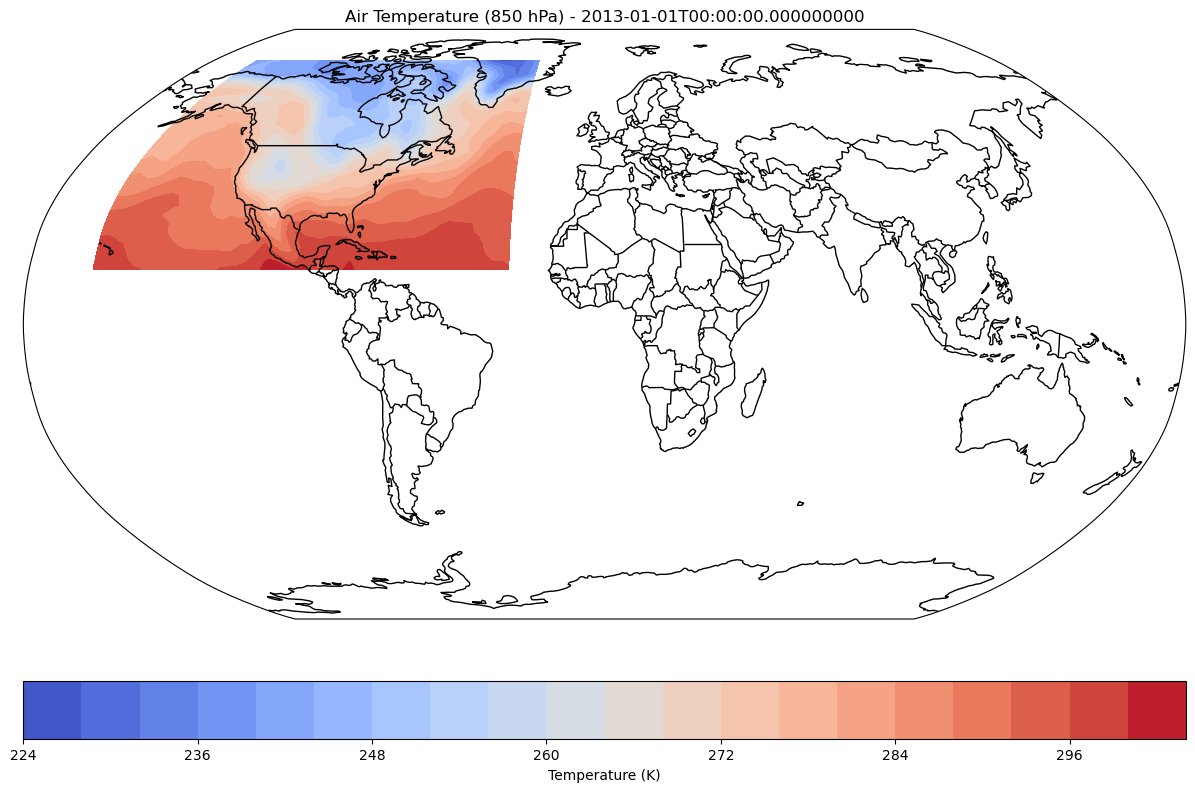

In [5]:

# Plot a map of temperature on the global map
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Robinson())

# Select the first time slice if it's not already selected
if 'time' in air_temp.dims:
    air_temp_2d = air_temp.isel(time=0)
else:
    air_temp_2d = air_temp

# Print information for debugging
print("Shape of air_temp_2d:", air_temp_2d.shape)
print("Longitude range:", air_temp_2d.lon.min().values, "to", air_temp_2d.lon.max().values)
print("Latitude range:", air_temp_2d.lat.min().values, "to", air_temp_2d.lat.max().values)

# Ensure longitudes are in the range -180 to 180
air_temp_2d = air_temp_2d.assign_coords(lon=(((air_temp_2d.lon + 180) % 360) - 180))

# Use contourf for plotting
im = ax.contourf(air_temp_2d.lon, air_temp_2d.lat, air_temp_2d, 
                 transform=ccrs.PlateCarree(), 
                 cmap='coolwarm', levels=20)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_global()
plt.title(f"Air Temperature (850 hPa) - {air_temp_2d.time.values}")

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08)
cbar.set_label('Temperature (K)')

plt.show()


### Code Explanation: Plotting Global Temperature Data with Cartopy

In this code, we visualize global air temperature data on a map using **Cartopy**. The dataset is displayed as a contour plot to show temperature distribution over the globe.

#### Step-by-Step Breakdown:

1. **Create the Figure and Axes:**
   - `fig = plt.figure(figsize=(15, 10))` initializes a new figure with a specified size.
   - `ax = plt.axes(projection=ccrs.Robinson())` creates a map with the Robinson projection, which provides a visually appealing representation of global data.

2. **Select Time Slice:**
   - `if 'time' in air_temp.dims:` checks if the dataset includes a time dimension.
   - `air_temp_2d = air_temp.isel(time=0)` selects the first time slice if the time dimension is present. If the time dimension is absent, `air_temp_2d` remains unchanged.

3. **Print Information for Debugging:**
   - `print("Shape of air_temp_2d:", air_temp_2d.shape)` prints the shape of the data array.
   - `print("Longitude range:", air_temp_2d.lon.min().values, "to", air_temp_2d.lon.max().values)` and `print("Latitude range:", air_temp_2d.lat.min().values, "to", air_temp_2d.lat.max().values)` provide information on the geographical extent of the data.

4. **Adjust Longitude Range:**
   - `air_temp_2d = air_temp_2d.assign_coords(lon=(((air_temp_2d.lon + 180) % 360) - 180))` ensures that longitudes are within the range of -180 to 180 degrees for proper plotting.

5. **Plot the Data:**
   - `im = ax.contourf(air_temp_2d.lon, air_temp_2d.lat, air_temp_2d, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20)` creates a filled contour plot of the temperature data using the `contourf` function. The `cmap` parameter specifies the color map, and `levels=20` sets the number of contour levels.

6. **Add Map Features:**
   - `ax.add_feature(cfeature.COASTLINE)` and `ax.add_feature(cfeature.BORDERS)` add coastlines and country borders to the map.
   - `ax.set_global()` sets the map to show the entire globe.

7. **Add Title and Colorbar:**
   - `plt.title(f"Air Temperature (850 hPa) - {air_temp_2d.time.values}")` adds a title to the plot, including the time of the data.
   - `cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.08)` adds a horizontal colorbar to indicate temperature values.
   - `cbar.set_label('Temperature (K)')` labels the colorbar with the unit of temperature.

8. **Display the Plot:**
   - `plt.show()` renders the plot on the screen.

This visualization provides a comprehensive view of global air temperature distribution at the specified pressure level, facilitating the analysis of temperature patterns across the globe.


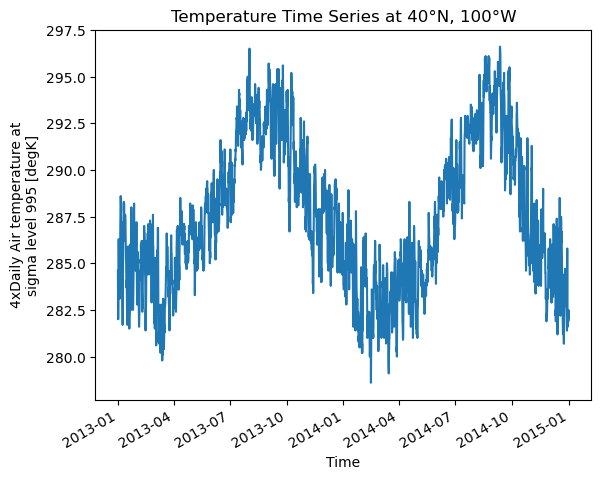

In [6]:
# Plot time series of temperature for a specific location
location = ds.air.sel(lat=40, lon=-100, method="nearest")
location.plot()
plt.title("Temperature Time Series at 40°N, 100°W")
plt.show()

### Code Explanation: Plotting Temperature Time Series for a Specific Location

In this code, we plot the time series of air temperature data for a specific geographical location using **Xarray** and **Matplotlib**.

#### Step-by-Step Breakdown:

1. **Select Specific Location:**
   - `location = ds.air.sel(lat=40, lon=-100, method="nearest")` extracts air temperature data for the nearest grid point to the latitude of 40°N and longitude of 100°W. The `sel` method with `method="nearest"` finds the nearest grid cell to the specified coordinates.

2. **Plot the Time Series:**
   - `location.plot()` creates a time series plot of the temperature data at the selected location. This uses the built-in plotting capabilities of Xarray, which integrates with Matplotlib to produce the plot.

3. **Add Title:**
   - `plt.title("Temperature Time Series at 40°N, 100°W")` adds a title to the plot indicating the location for which the temperature time series is shown.

4. **Display the Plot:**
   - `plt.show()` renders the plot on the screen.

This plot provides a visual representation of how temperature has varied over time at a specific location, allowing for an analysis of trends and fluctuations at that point.


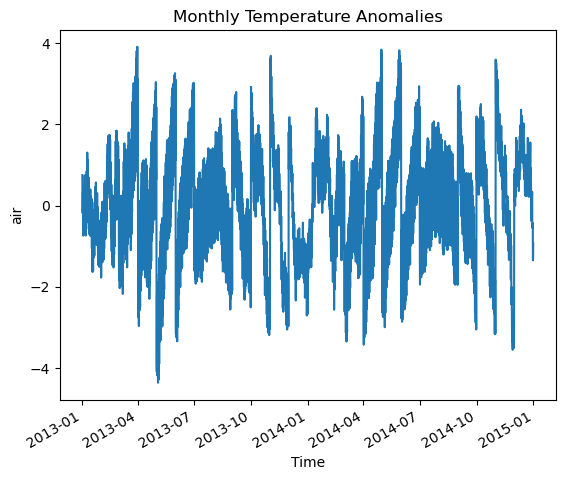

In [7]:
# Plot monthly temperature anomalies
if 'level' in anomalies.coords:
    monthly_anomalies = anomalies.sel(level=850).mean(dim=["lat", "lon"])
else:
    monthly_anomalies = anomalies.mean(dim=["lat", "lon"])

monthly_anomalies.plot()
plt.title("Monthly Temperature Anomalies")
plt.show()

### Code Explanation: Plotting Monthly Temperature Anomalies

In this code, we plot the monthly temperature anomalies derived from the air temperature dataset using **Xarray** and **Matplotlib**.

#### Step-by-Step Breakdown:

1. **Select and Average Anomalies:**
   - `if 'level' in anomalies.coords:` checks if the dataset includes a level dimension (e.g., pressure level).
   - `monthly_anomalies = anomalies.sel(level=850).mean(dim=["lat", "lon"])` selects the anomalies at the 850 hPa pressure level and calculates the mean across latitude and longitude dimensions.
   - If the level dimension is not present, the code simply calculates the mean anomalies across latitude and longitude using `monthly_anomalies = anomalies.mean(dim=["lat", "lon"])`.

2. **Plot Monthly Anomalies:**
   - `monthly_anomalies.plot()` generates a time series plot of the monthly temperature anomalies. This uses Xarray’s built-in plotting function to create a plot that shows how temperature anomalies vary over time.

3. **Add Title:**
   - `plt.title("Monthly Temperature Anomalies")` adds a title to the plot, indicating that it represents monthly temperature anomalies.

4. **Display the Plot:**
   - `plt.show()` renders the plot on the screen.

This visualization provides insight into how temperature anomalies vary month-to-month, helping to identify trends and deviations from the expected climate norms.
